## What is Autograd?

**Autograd** is PyTorch's automatic differentiation engine. It allows you to compute **gradients** of tensors automatically through the **backpropagation** process.

Whenever you perform operations on tensors with `requires_grad=True`, PyTorch builds a **computational graph** behind the scenes. When you call `.backward()`, autograd traces this graph to compute gradients with respect to each parameter.

This is essential for training neural networks, where we need to compute gradients of the loss with respect to weights.

### 🔁 Example:
```python
import torch

x = torch.tensor(2.0, requires_grad=True)
y = x ** 2
y.backward()
print(x.grad)  # Output: 4.0 (dy/dx = 2x at x=2)

In [ ]:
!pip install torchviz

In [ ]:
import torch

# Define input with requires_grad=True to track computation
x = torch.tensor(2.0, requires_grad=True)

# Define the function
def f(x):
    return 5 + x**2

y = f(x)

# Perform backpropagation (compute dy/dx)
y.backward()

print(f"x = {x}")
print(f"y = x^2 = {y}")
print(f"dy/dx at x=2 = {x.grad}")

x = 2.0
y = x^2 = 9.0
dy/dx at x=2 = 4.0


In [16]:
from torchviz import make_dot

# Plot the graph
dot = make_dot(y, params={'x': x})
dot.render('graph', format='png', cleanup=True)  # Saves 'graph.png'

'graph.png'

### An Example of Neural Network Implementation in PyTorch

In [3]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(3, 4),
    nn.Linear(4, 2),
)

# Print named parameters
for name, param in model.named_parameters():
    print(f"{name}: {param.shape}")

0.weight: torch.Size([4, 3])
0.bias: torch.Size([4])
1.weight: torch.Size([2, 4])
1.bias: torch.Size([2])


In [ ]:
# With Activation Function
model = nn.Sequential(
    nn.Linear(3, 4),
    nn.LeakyReLU(),
    nn.Linear(4, 2),
)

### Activation Functions

### Tanh Activation and the Vanishing Gradient Problem

The **tanh** (hyperbolic tangent) activation function is defined as:

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

It squashes input values to the range **(-1, 1)** and is **zero-centered**, which often helps with optimization compared to sigmoid.


#### Advantages of `tanh(x)`:
- Zero-centered output
- Smooth gradient
- Often performs better than sigmoid in practice

#### Vanishing Gradient Problem:

The derivative of tanh is:

$$
\frac{d}{dx} \tanh(x) = 1 - \tanh^2(x)
$$

As $|x|$ increases, $tanh(x) \rightarrow \pm1$, so:

$$
\frac{d}{dx} \tanh(x) \rightarrow 0
$$

This causes the **vanishing gradient problem** in deep networks:

- Gradients become extremely small as they propagate backward through many layers
- This slows learning and can lead to **no updates** for earlier layers
- Especially problematic for deep RNNs and very deep feedforward nets

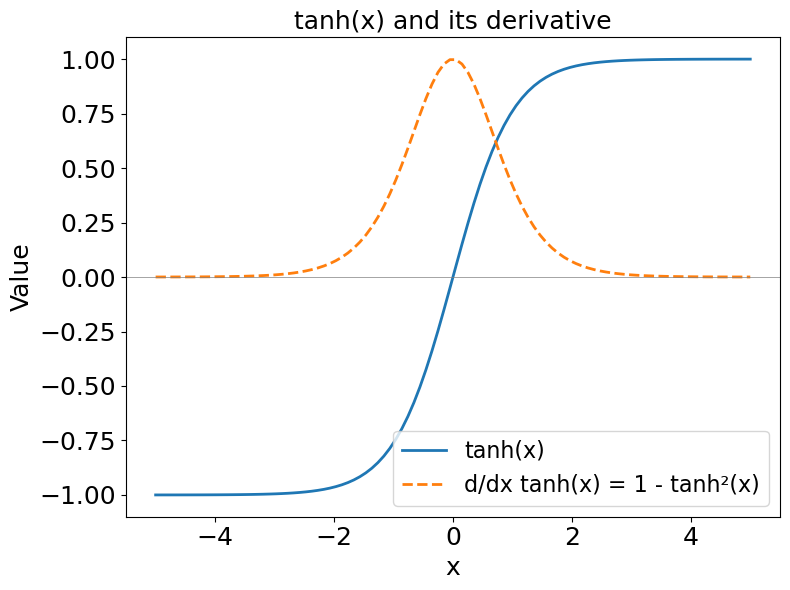

In [9]:
import torch
import matplotlib.pyplot as plt

# Generate input values
x = torch.linspace(-5, 5, 100, requires_grad=True)

# Compute tanh(x)
y = torch.tanh(x)

# Derivative: 1 - tanh^2(x)
dy_dx = 1 - y**2

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x.detach(), y.detach(), label='tanh(x)', linewidth=2)
plt.plot(x.detach(), dy_dx.detach(), label="d/dx tanh(x) = 1 - tanh²(x)", linestyle='--', linewidth=2)
plt.axhline(0, color='gray', linewidth=0.5)
plt.title('tanh(x) and its derivative', fontsize=18)
plt.xlabel('x', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.legend(fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()

### ReLU Activation and Gradient Behavior

The **ReLU (Rectified Linear Unit)** activation function is defined as:

$$
\text{ReLU}(x) = \max(0, x)
$$

It sets all negative values to zero and keeps positive values unchanged.

#### Advantages of ReLU:
- Simple and efficient to compute
- Helps avoid vanishing gradients for positive activations
- Enables faster training and convergence


#### Derivative of ReLU:

$$
\text{ReLU}'(x) =
\begin{cases}
1 & \text{if } x > 0 \\
0 & \text{if } x \leq 0
\end{cases}
$$

#### Potential Issue — Dying ReLUs:
- Neurons can **"die"** during training (i.e., always output zero)
- Happens if inputs become permanently negative
- This stops gradient flow and updates

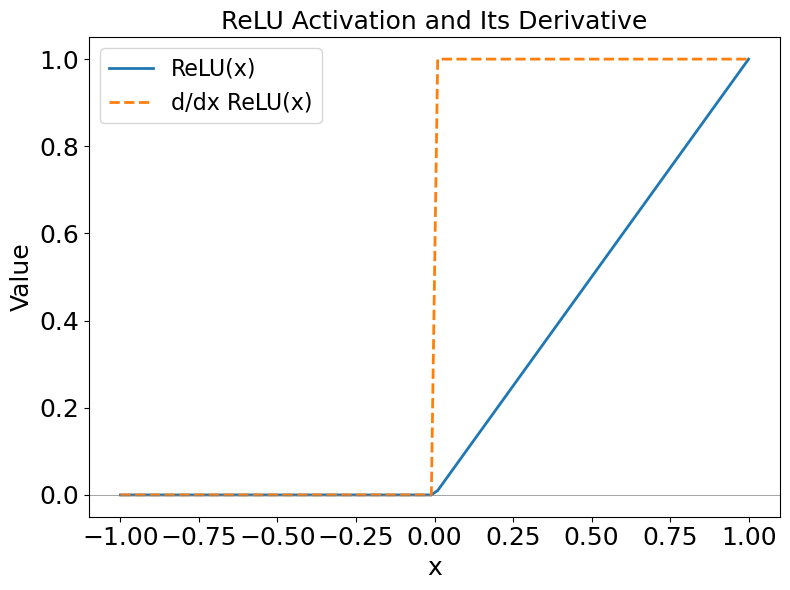

In [12]:
import torch
import matplotlib.pyplot as plt

# Input values
x = torch.linspace(-1, 1, 100, requires_grad=True)

# ReLU activation
relu = torch.nn.functional.relu(x)

# Derivative: 1 for x > 0, else 0
drelu = torch.where(x > 0, torch.ones_like(x), torch.zeros_like(x))

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x.detach(), relu.detach(), label='ReLU(x)', linewidth=2)
plt.plot(x.detach(), drelu.detach(), label="d/dx ReLU(x)", linestyle='--', linewidth=2)
plt.axhline(0, color='gray', linewidth=0.5)
plt.title('ReLU Activation and Its Derivative', fontsize=18)
plt.xlabel('x', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.legend(fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()


### Leaky ReLU Activation

The **Leaky ReLU** is a modified version of ReLU that allows a small, non-zero gradient when the input is negative. It's defined as:

$$
\text{LeakyReLU}_\alpha(x) =
\begin{cases}
x & \text{if } x > 0 \\
\alpha x & \text{if } x \leq 0
\end{cases}
$$

For $\alpha = 0.3$:

$$
\text{LeakyReLU}_{0.3}(x) =
\begin{cases}
x & x > 0 \\
0.3x & x \leq 0
\end{cases}
$$


#### Benefits:
- Fixes the "dying ReLU" problem by keeping neurons **active** even when \( x < 0 \)
- Keeps gradients flowing during backpropagation

#### Derivative:

$$
\frac{d}{dx} \text{LeakyReLU}_{0.3}(x) =
\begin{cases}
1 & x > 0 \\
0.3 & x \leq 0
\end{cases}
$$

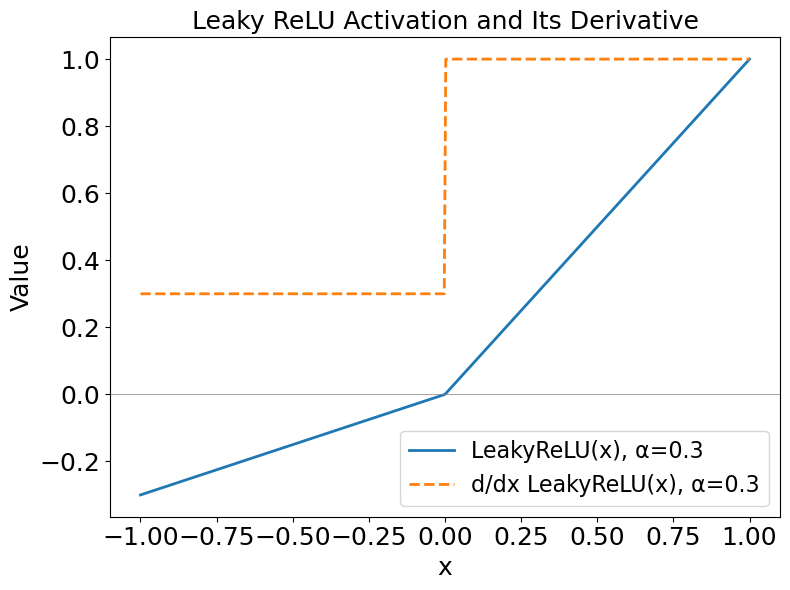

In [15]:
import torch
import matplotlib.pyplot as plt

# Parameters
alpha = 0.3

# Input values
x = torch.linspace(-1, 1, 400, requires_grad=True)

# Leaky ReLU activation
leaky_relu = torch.where(x > 0, x, alpha * x)

# Derivative
dleaky_relu = torch.where(x > 0, torch.ones_like(x), torch.full_like(x, alpha))

# Plot
plt.figure(figsize=(8, 6))
plt.plot(x.detach(), leaky_relu.detach(), label=f'LeakyReLU(x), α={alpha}', linewidth=2)
plt.plot(x.detach(), dleaky_relu.detach(), label=f'd/dx LeakyReLU(x), α={alpha}', linestyle='--', linewidth=2)
plt.axhline(0, color='gray', linewidth=0.5)
plt.title('Leaky ReLU Activation and Its Derivative', fontsize=18)
plt.xlabel('x', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.legend(fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()


# Cross-Entropy in Binary Classification

Cross-entropy is a loss function commonly used in binary classification tasks. It measures the difference between the **true label distribution** and the **predicted probability distribution** from a model.

### Definition

If the true label is $y \in \{0, 1\}$ and the predicted probability for class 1 is $\hat{y} \in (0,1)$, the **binary cross-entropy loss** is:

$$
\text{Loss}(y, \hat{y}) = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

### Interpretation:

- When \( y = 1 \), the loss simplifies to:  
  $$
  -\log(\hat{y})
  $$
  This penalizes low predicted probabilities for the true class 1.

- When \( y = 0 \), the loss becomes:  
  $$
  -\log(1 - \hat{y})
  $$
  This penalizes high predicted probabilities for the incorrect class.

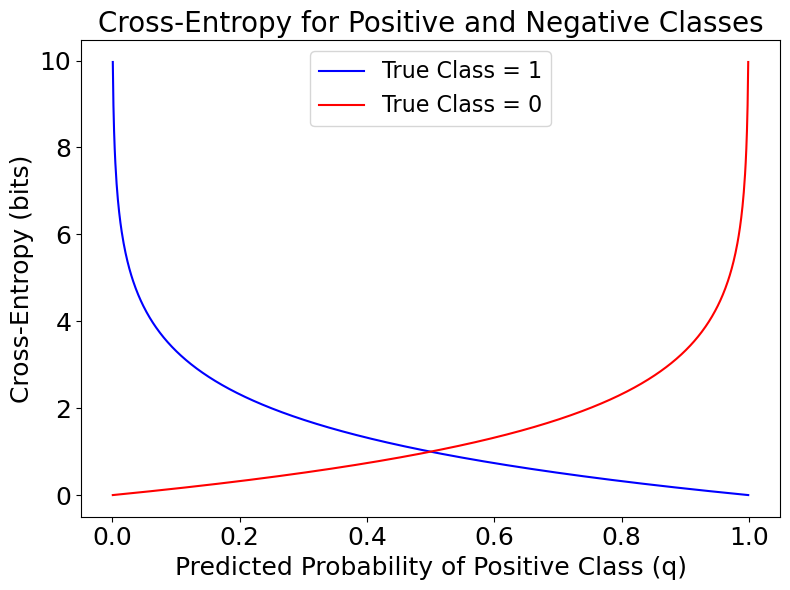

In [19]:
import numpy as np
# Two true cases: positive class (p=1), negative class (p=0)
q_pred = np.linspace(0.001, 0.999, 1000)

# Cross-entropy for true label = 1 (positive class)
cross_entropy_pos = -np.log2(q_pred)

# Cross-entropy for true label = 0 (negative class)
cross_entropy_neg = -np.log2(1 - q_pred)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(q_pred, cross_entropy_pos, label='True Class = 1', color='blue')
ax.plot(q_pred, cross_entropy_neg, label='True Class = 0', color='red')
ax.set_title('Cross-Entropy for Positive and Negative Classes', fontsize=20)
ax.set_xlabel('Predicted Probability of Positive Class (q)', fontsize=18)
ax.set_ylabel('Cross-Entropy (bits)', fontsize=18)
plt.legend(fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()